<h1 align = "center" style = "color:gold"> Secant Method </h1>

---

In [4]:
# Import necessary modules
import numpy as np 
import matplotlib.pyplot as plt
try:
    plt.style.use(["science", "notebook", "grid", "dark_background"])
except:
    # Install scienceplots
    print("SciencePlots not installed. Installing...")
    import subprocess
    subprocess.run(["pip", "install", "scienceplots"])
    import scienceplots
    plt.style.use(["science", "notebook", "grid", "dark_background"])

The Secant Method is a numerical technique used for finding roots of a real-valued function. It's an iterative method and can be seen as a modification of Newton's Method, providing a means of approximating the root without the need for calculating the derivative of the function.

<img src = "../Secant_method/images/animation.gif">


### Basic Principle
---
The method uses the secant line - the line intersecting two points on the function - to approximate the root. The assumption is that the root can be approximated by the point where this secant line crosses the x-axis.

### The Algorithm
---

The Secant Method can be outlined as follows:

1. **Initial Points**: Start with two initial guesses, $x_0$ and $x_1$, close to the root.

2. **Iterative Process**: Repeat the following steps:
   
   - Calculate the next approximation $x_{n+1}$ using the formula:
     $$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$
   - This formula uses the last two approximations $x_n$ and $x_{n-1}$ to generate a new approximation $x_{n+1}$.

3. **Convergence Check**: The process is typically stopped when the absolute difference between successive approximations is below a certain threshold, or after a predetermined number of iterations.

<img src = "../Secant_method/images/Flow-chart-of-Secant-method.png">

In [12]:
def secant(f, x0: float, x1: float, tol: float = 1e-8, maxiter: int = 1000, 
           shift_factor: float = 0.01, vertical_case_threshold: float = 1e-12) -> float:
    """Uses the secant method to find a root of f.
    Parameters:
        f: The function to find a root of.
        x0, x1: The initial points.
        NOTE: x0 and x1 are important. If they are not chosen
        correctly, the secant method will not converge.
        tol: The tolerance for the stopping criterion. Default is 1e-5.
        maxiter: The maximum number of iterations. Default is 1000.
        shift_factor: The factor to shift x1 by when the secant line is vertical.
        vertical_case_threshold: The threshold for the difference between f(x1) and f(x0) to be considered vertical.
    Returns:
        (float) : The approximate root."""
    for _ in range(maxiter):
        """Check for the stopping criterion.
        We use both the difference and the function value because
        sometimes the difference is close to zero even when the
        function value is zero."""
        f_x1 : float = f(x1) # Store the function value for x1 for efficiency.
        f_x0 : float = f(x0) # Store the function value for x0 for efficiency.
        if abs(x1 - x0) < tol or abs(f_x1) < tol:
            print(f"Secant method converged after {_} iterations.")
            return x1 # Stopping criterion met.
        # Handle the case where the secant line is vertical.
        # This is done by shifting x1 by a factor of shift_factor of the distance between x1 and x0.
        if abs(f_x1 - f_x0) < vertical_case_threshold:
            x1 = x1 + shift_factor * (x1 - x0)
            continue
        # Use the secant method formula to update x1.
        x1, x0 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0), x1

    raise ValueError(f"Secant method failed to converge after {maxiter} iterations. Last found value is {x1}")

### Some modifications 
---
The condition of vertical secant line is not allowed in the secant method. So, we can modify the secant method by using the method:
- If $f(x_n) = f(x_{n-1})$, then $x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$ is not defined. This is the case of a vertical secant line. So, we update the new iteration of $x_{n+1}$ by using the formula:
$$ x_{n+1} = \alpha * (x_n - x_{n-1})$$ 
where $\alpha$ is a constant. 
Then we continue the iteration process.

### Key Features

- **No Derivative Needed**: Unlike Newton's Method, the Secant Method does not require the computation of derivatives, which can be advantageous for functions where the derivative is difficult to compute.

- **Convergence**: The method usually converges faster than the Bisection Method but slower than Newton's Method. It has superlinear convergence, which is generally faster than linear but slower than quadratic convergence.

- **Initial Guess Sensitivity**: The convergence of the method depends on the choice of initial guesses. Poor choices can lead to divergence or slow convergence.

- **Simplicity and Efficiency**: The method is relatively simple to implement and can be more efficient than methods requiring derivative computation, especially for complex functions.

### Applications
The Secant Method is widely used in various fields for solving equations where the derivative of the function is not readily available or is too complex to compute. It is particularly useful in scenarios where an approximate solution is sufficient, and computational efficiency is a concern.

## Visualiztion
---

Secant method converged after 4 iterations.
The root of the function is 0.5671
The function value at the root is -0.0000


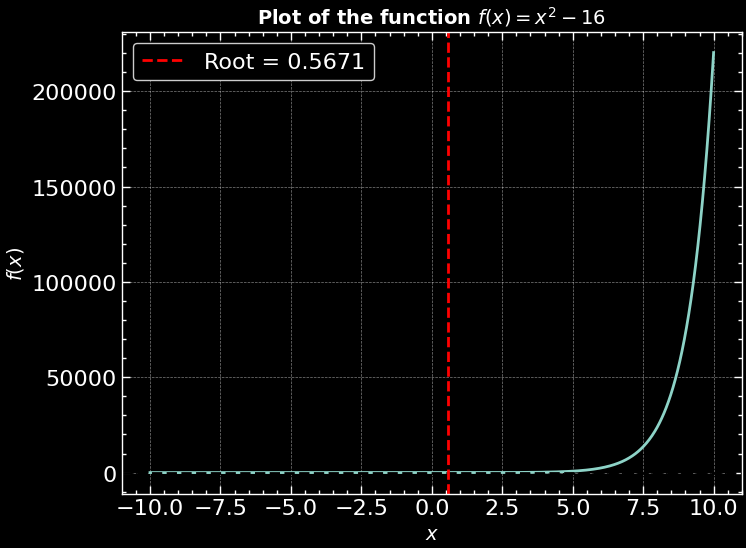

In [16]:
test_func = lambda x : x*np.exp(x) - 1
x : np.ndarray = np.linspace(-10, 10, 1000)

# Find the root of the function
INITIAL_GUESS1 : float = 0.4
INITIAL_GUESS2 : float = 0.6
root : float = secant(test_func, INITIAL_GUESS1, INITIAL_GUESS2)
print(f"The root of the function is {root:.4f}")
print(f"The function value at the root is {test_func(root):.4f}")

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, test_func(x))
plt.axhline(0, color="black", linestyle="--")
plt.axvline(root, color="red", linestyle="--", label=f"Root = {root:.4f}")
plt.xlabel("$x$", fontsize=14, fontweight="bold")
plt.ylabel("$f(x)$", fontsize=14, fontweight="bold")
plt.title("Plot of the function $f(x) = x^2 - 16$", fontsize=14, fontweight="bold")
plt.legend();


### Time Complexity

1. **Function Evaluations Per Iteration**: The primary operations in each iteration are evaluating the function $f(x)$ at points $x_0$ and $x_1$. The complexity of these operations depends on the complexity of $f$. Assuming $f$ can be computed in constant time, these operations are $O(1)$.

2. **Number of Iterations**: The number of iterations is capped by `maxiter`, which is a user-defined parameter. In the worst case, the algorithm will run for `maxiter` iterations. However, the algorithm could converge much earlier based on the stopping criteria.

3. **Overall Time Complexity**: Assuming that each iteration takes constant time, the time complexity is $O(maxiter)$. The actual number of iterations required for convergence will depend on the specific function, the initial guesses, and the tolerance.

### Space Complexity

1. **Variables Used**: The algorithm uses a fixed number of variables (`x0`, `x1`, `f_x0`, `f_x1`, etc.), and these do not depend on the size of the input or the complexity of the function.

2. **Function Evaluation Space**: The space complexity also depends on the space required to evaluate the function $f$. Assuming these evaluations require constant space, the overall space complexity would be $O(1)$.

### Additional Considerations

- **Function Complexity**: If the function $f$ is complex and requires significant computational resources, it can affect the actual running time significantly.

- **Convergence Behavior**: The time complexity analysis assumes the worst-case scenario of reaching the maximum number of iterations. In practice, the method often converges in fewer iterations, especially with well-chosen initial guesses and for well-behaved functions.

- **Arithmetic Operations**: The analysis assumes that arithmetic operations (addition, subtraction, division) take constant time. This is a standard assumption in complexity analysis but can vary for extremely large numbers or in certain computational environments.

In summary, the time complexity of your Secant Method implementation is $O(maxiter)$, and the space complexity is $O(1)$, assuming constant time for function evaluations and arithmetic operations. The actual performance in practice will depend on the characteristics of the function being analyzed and the chosen parameters.

## Questions
---


### Theoretical Questions

1. **Explain the Secant Method**: Describe how the Secant Method is used to find roots of equations. How does it differ from the Newton-Raphson and Bisection methods?

2. **Convergence Criteria**: Discuss the convergence criteria of the Secant Method. Under what conditions does the method guarantee convergence?

3. **Advantages and Limitations**: What are the advantages of using the Secant Method over other root-finding methods? What are its limitations?

4. **Impact of Initial Guesses**: How do the initial guesses $x_0$ and $x_1$ affect the convergence of the Secant Method? Give an example where poor initial guesses lead to failure in convergence.

5. **Handling Near-Vertical Secant Lines**: Explain how the Secant Method can be modified to handle cases where the secant line is nearly vertical. What are the potential implications of this modification?

### Practical Lab Questions

1. **Implement the Secant Method**: Write a Python function to implement the Secant Method. Test your function on the equation $$f(x) = x^2 - 4$$ with initial guesses $$x_0 = 2.5$$ and $$x_1 = 3.5$$.

2. **Convergence Analysis**: Use the Secant Method to find the root of $$f(x) = e^{-x} - x$$. Perform the method with different initial guesses and record the number of iterations required for convergence. Analyze how sensitive the method is to the choice of initial guesses.

3. **Comparative Study**: Compare the efficiency of the Secant Method with the Newton-Raphson Method and the Bisection Method in finding the root of $$f(x) = \cos(x) - x$$. Evaluate based on the number of iterations and computational time.

4. **Handling Difficult Functions**: Apply the Secant Method to a function known for causing difficulties in root-finding, such as $$f(x) = x^3 - 2x + 2$$. Discuss any challenges encountered and how they were (or could be) overcome.

5. **Real-World Application**: Use the Secant Method to solve a real-world problem, such as finding the break-even point in a business model or calculating the rate of chemical reaction under certain conditions. Describe the problem, apply the method, and interpret the results.